In [8]:
import torch
import torchviz

In [6]:
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)
y1 = x1 * x2
y2 = torch.log(y1)
y3 = torch.sin(y1)
z = y2 * y3

z.backward()

print(f"dz/dx_1: {x1.grad}")
print(f"dz/dx_2: {x2.grad}")

dz/dx_1: 0.33239537477493286
dz/dx_2: 0.16619768738746643


In [4]:
"""
末端以外の微分係数はgrad属性がNoneなので、警告が出る
"""
print(f"dz/y_1: {y1.grad}")

dz/y_1: None


/var/folders/1f/gykd0bss0tj5jxccbnpc4x2m0000gn/T/ipykernel_8204/3066646827.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/build/aten/src/ATen/core/TensorBody.h:494.)
  print(f"dz/y_1: {y1.grad}")


In [7]:
# 逆伝播時に末端以外のテンソルの微分係数の記録するようにしたい！！
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)
y1 = x1 * x2
y2 = torch.log(y1)
y3 = torch.sin(y1)
z = y2 * y3

y1.retain_grad()
y2.retain_grad()
y3.retain_grad()

z.backward()

print(f"dz/dx_1={x1.grad}, is_leaf={x1.is_leaf}")
print(f"dz/dx_2={x2.grad}, is_leaf={x2.is_leaf}")
print(f"dz/y_1={y1.grad}, is_leaf={y1.is_leaf}")
print(f"dz/y_2={y2.grad}, is_leaf={y2.is_leaf}")
print(f"dz/y_3={y3.grad}, is_leaf={y3.is_leaf}")

dz/dx_1=0.33239537477493286, is_leaf=True
dz/dx_2=0.16619768738746643, is_leaf=True
dz/y_1=0.16619768738746643, is_leaf=False
dz/y_2=0.9092974066734314, is_leaf=False
dz/y_3=0.6931471824645996, is_leaf=False


In [14]:
import torch
from torchviz import make_dot

# 計算グラフを作成する。
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)
y1 = x1 * x2

y1_detach = y1.detach()
print(y1_detach.requires_grad)
y2 = torch.log(y1_detach)
y3 = torch.sin(y1)
z = y2 * y3

# 逆伝搬を行う。
z.backward()

print(f"dz/dx1={x1.grad}")
print(f"dz/dx2={x2.grad}")

False
dz/dx1=-0.5769020318984985
dz/dx2=-0.28845101594924927


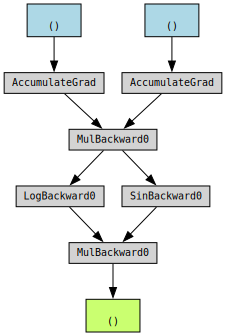

In [18]:
import torch
from torchviz import make_dot

x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(2.0, requires_grad=True)
y1 = x1 * x2

y2 = torch.log(y1)
y3 = torch.sin(y1)
z = y2 * y3

dot = make_dot(z)
dot